In [1]:
import os
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import json
os.chdir('..')
from image_processing import DatasetProcessor
from mrcnn import visualize

In [2]:
with open(os.path.join('data', 'label_descriptions.json')) as json_data:
    label_descriptions = json.load(json_data)

In [3]:
list(label_descriptions.keys())

['info', 'categories', 'attributes']

In [4]:
label_descriptions['info']

{'year': 2019,
 'version': '1.0',
 'description': 'The 2019 FGVC^6 iMaterialist Competition - Fashion track dataset.',
 'contributor': 'iMaterialist Fashion Competition group',
 'url': 'https://github.com/visipedia/imat_comp',
 'date_created': '2019-04-19 12:38:27.493919'}

In [5]:
categories = pd.io.json.json_normalize(label_descriptions['categories'])
categories.head(5)

,id,level,name,supercategory
0,0,2,"shirt, blouse",upperbody
1,1,2,"top, t-shirt, sweatshirt",upperbody
2,2,2,sweater,upperbody
3,3,2,cardigan,upperbody
4,4,2,jacket,upperbody


In [6]:
attributes = pd.io.json.json_normalize(label_descriptions['attributes'])
attributes.head(5)

,id,level,name,supercategory
0,0,1,above-the-hip (length),length
1,1,1,hip (length),length
2,2,1,micro (length),length
3,3,1,mini (length),length
4,4,1,above-the-knee (length),length


In [7]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
train_df.head(5)

,ImageId,EncodedPixels,Height,Width,ClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32


In [8]:
train_df['hasAttributes'] = train_df.ClassId.apply(lambda x: x.find("_") > 0)
train_df['CategoryId'] = train_df.ClassId.apply(lambda x: x.split("_")[0]).astype(int)
train_df = train_df.merge(categories, left_on="CategoryId", right_on="id")
train_df.head(5)

,ImageId,EncodedPixels,Height,Width,ClassId,hasAttributes,CategoryId,id,level,name,supercategory
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,False,6,6,2,pants,lowerbody
1,000775b6b5e27b011dc8bba2d7b85211.jpg,618579 4 620176 10 621775 14 623375 15 624974 ...,1600,1067,6,False,6,6,2,pants,lowerbody
2,000b3ec2c6eaffb491a5abb72c2e3e26.jpg,701292 5 703597 15 705903 25 708209 34 710515 ...,2310,1536,6,False,6,6,2,pants,lowerbody
3,000c5bb8ca785bce8d00e3a6c7802a8c.jpg,228212 5 229230 11 230254 12 231277 13 232300 ...,1024,683,6,False,6,6,2,pants,lowerbody
4,000e973c99dc090afd7898c93daf0dbc.jpg,5798129 11 5803042 35 5807956 58 5812870 80 58...,4928,3264,6_8_20_39_60_70,True,6,6,2,pants,lowerbody


In [9]:
len(categories)

46

In [10]:
len(attributes)

92

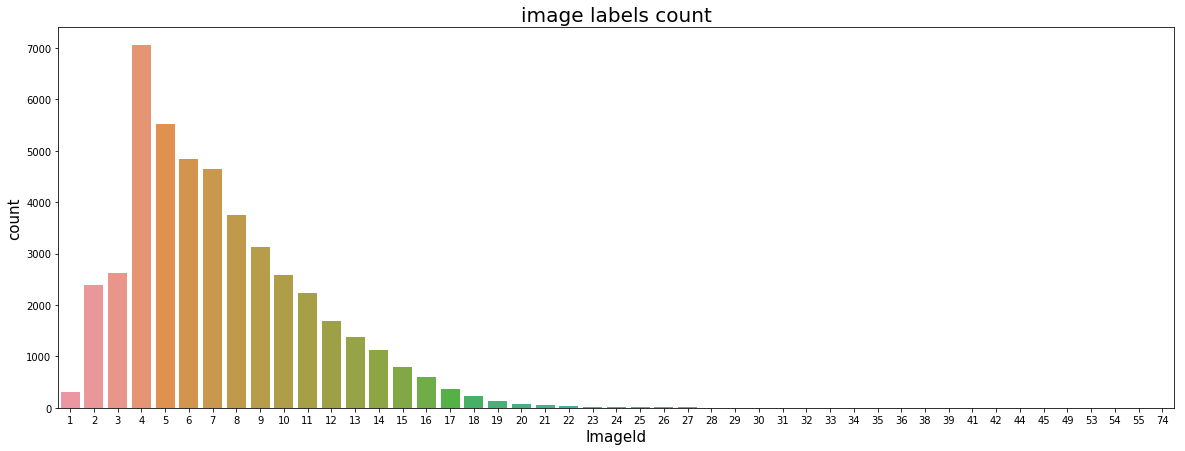

In [11]:
train_df_ImageId_count = train_df['ImageId'].value_counts()
plt.figure(figsize=(20, 7))
plt.title('image labels count', size=20)
plt.xlabel('', size=15);plt.ylabel('', size=15);
sns.countplot(train_df_ImageId_count)
plt.show()

In [12]:
ratio1 = np.round(train_df.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'})/train_df.shape[0] * 100, 2)
train_df_name_stat = train_df.groupby(['ClassId', 'name']).count().sort_values(by='id', ascending=False).rename(columns = {'id':'count'}).reset_index()
train_df_name_stat['ratio(%)'] = list(ratio1.ImageId)
train_df_name_stat

,ClassId,name,ImageId,EncodedPixels,Height,Width,hasAttributes,CategoryId,count,level,supercategory,ratio(%)
0,31,sleeve,59452,59452,59452,59452,59452,59452,59452,59452,59452,17.83
1,23,shoe,46374,46374,46374,46374,46374,46374,46374,46374,46374,13.91
2,33,neckline,34259,34259,34259,34259,34259,34259,34259,34259,34259,10.28
3,32,pocket,27179,27179,27179,27179,27179,27179,27179,27179,27179,8.15
4,10,dress,15650,15650,15650,15650,15650,15650,15650,15650,15650,4.69
5,1,"top, t-shirt, sweatshirt",14035,14035,14035,14035,14035,14035,14035,14035,14035,4.21
6,6,pants,10694,10694,10694,10694,10694,10694,10694,10694,10694,3.21
7,28,collar,10159,10159,10159,10159,10159,10159,10159,10159,10159,3.05
8,35,zipper,7994,7994,7994,7994,7994,7994,7994,7994,7994,2.40
9,24,"bag, wallet",7217,7217,7217,7217,7217,7217,7217,7217,7217,2.16


In [13]:
segment_df = pd.read_csv(os.path.join('data', 'train.csv'))
segment_df['CategoryId'] = segment_df['ClassId'].str.split('_').str[0]

In [14]:
print("Total segments:", len(segment_df))
segment_df.head()

Total segments: 333415


,ImageId,EncodedPixels,Height,Width,ClassId,CategoryId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,32


In [15]:
image_df = segment_df.groupby('ImageId')['EncodedPixels', 'CategoryId'].agg(lambda x: list(x))
size_df = segment_df.groupby('ImageId')['Height', 'Width'].mean()
image_df = image_df.join(size_df, on='ImageId')

print("Total images: ", len(image_df))
image_df.head()

Total images:  45625


,EncodedPixels,CategoryId,Height,Width
ImageId,,,,
00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214,3676
0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]",2448,2448
0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]",3000,1997
0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]",567,400
0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]",750,500


In [16]:
dataset = DatasetProcessor(image_df)
dataset.prepare()

32344
('data/images/b54d554988a1c6e7992c811beb9269f3.jpg', ['neckline', 'dress', 'shoe', 'shoe'])


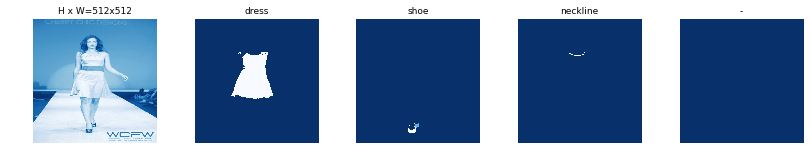

24811
('data/images/8b44d15ba9717da61073b91633cec90d.jpg', ['sleeve', 'sleeve', 'shirt, blouse', 'collar', 'lapel', 'coat', 'pants', 'shoe', 'shoe', 'sleeve', 'glasses', 'rivet'])


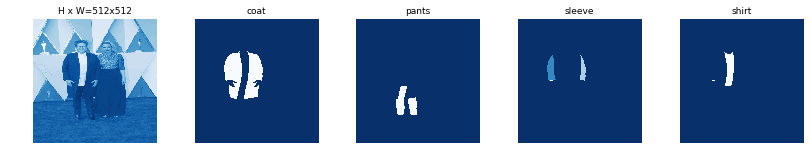

26659
('data/images/955ac333f2df78f66759f1ffb9340155.jpg', ['shoe', 'shoe', 'dress', 'neckline'])


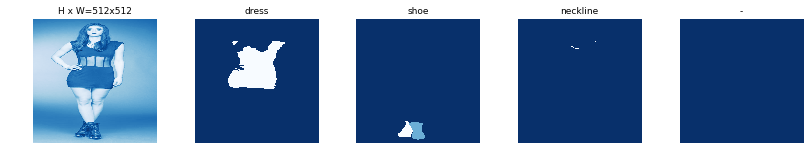

41777
('data/images/eb258808eb6d332e6fe40a167c2c9857.jpg', ['shirt, blouse', 'sleeve', 'sleeve', 'neckline'])


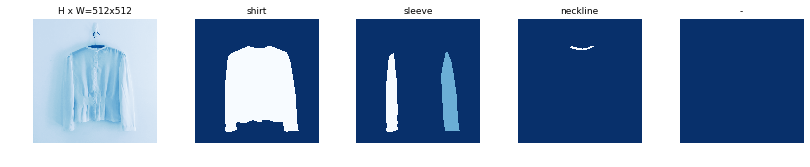

17661
('data/images/6351ea92b469be3bb94595cffc315e4f.jpg', ['top, t-shirt, sweatshirt', 'neckline', 'skirt', 'shoe'])


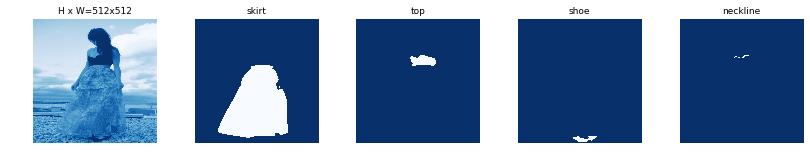

3513
('data/images/13d02b72454c8f29f66efc6589a2f14e.jpg', ['sleeve', 'sleeve', 'neckline', 'top, t-shirt, sweatshirt', 'jacket', 'belt'])


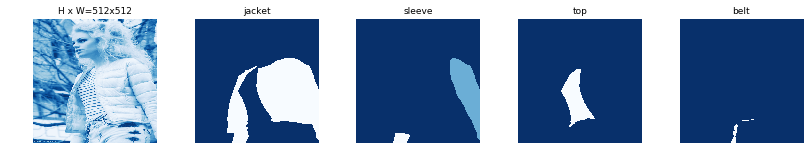

19392
('data/images/6cc30a74e1dcc80dd9ae2e31394a87ac.jpg', ['shoe', 'shoe', 'pants', 'top, t-shirt, sweatshirt', 'neckline', 'sleeve', 'sleeve', 'glasses', 'jacket'])


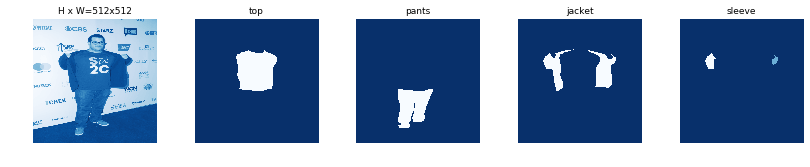

18834
('data/images/69e90671cb13c5ae634cf7a254dd8a60.jpg', ['vest', 'top, t-shirt, sweatshirt', 'pants', 'bag, wallet', 'sleeve', 'sleeve', 'glasses', 'lapel', 'neckline'])


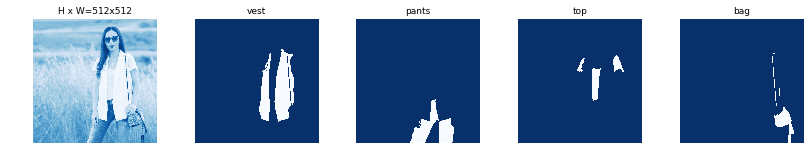

36234
('data/images/cb72b2fcfd26f42db082bb7be2704a3f.jpg', ['headband, head covering, hair accessory', 'dress', 'neckline', 'bead'])


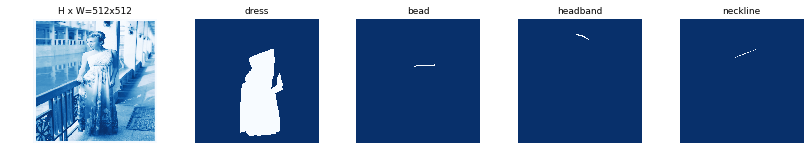

4439
('data/images/18d61323bd8b93ea0809d810d96639ac.jpg', ['dress', 'belt', 'neckline', 'shoe', 'shoe'])


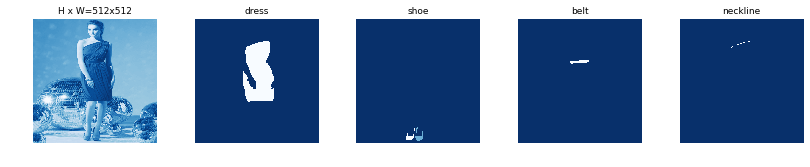

In [17]:
for i in range(10):
    image_id = random.choice(dataset.image_ids)
    print(image_id)
    print(dataset.image_reference(image_id))
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=4)